In [4]:
import json
import pickle
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor


In [5]:
# Feature Engineering
df = pd.read_csv('/home/akeemlag/Downloads/processes2.csv')
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [6]:
df.columns

Index(['Unnamed: 0', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'seats', 'max_power (in bph)',
       'Mileage Unit', 'Mileage', 'Engine (CC)'],
      dtype='object')

In [7]:
"""ANLYSIS"""
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

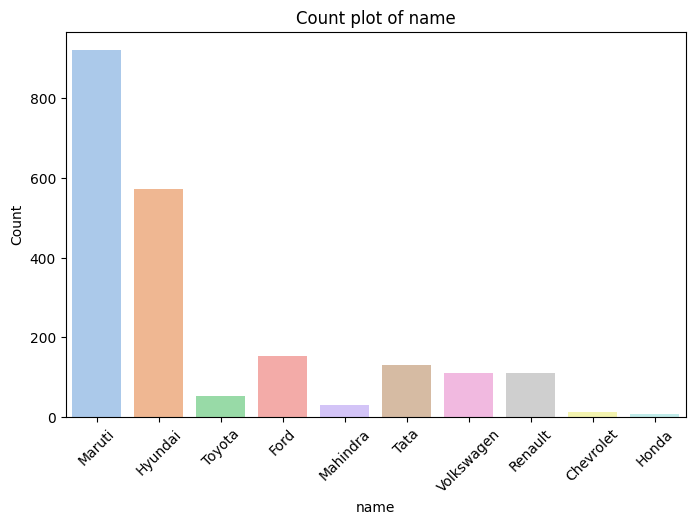

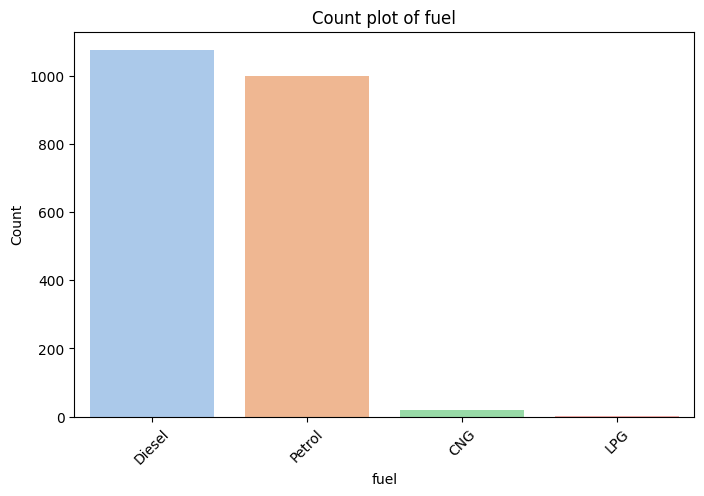

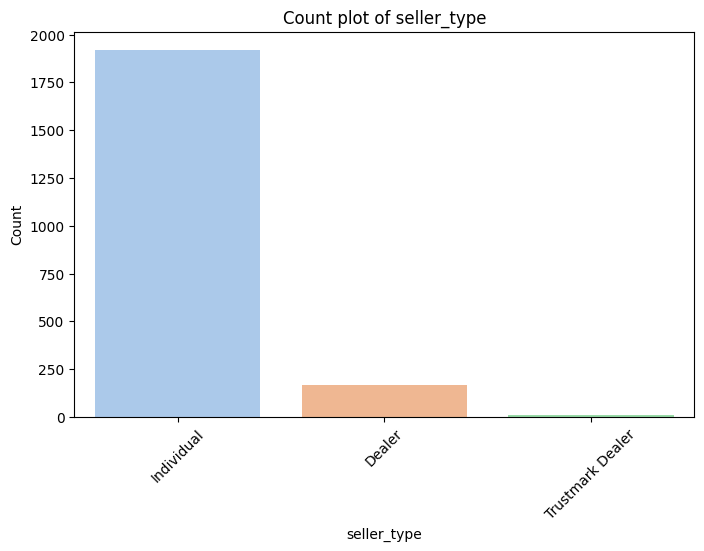

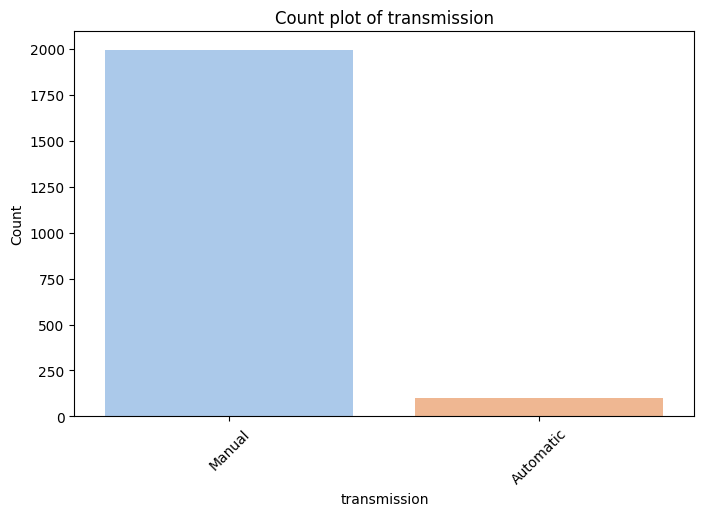

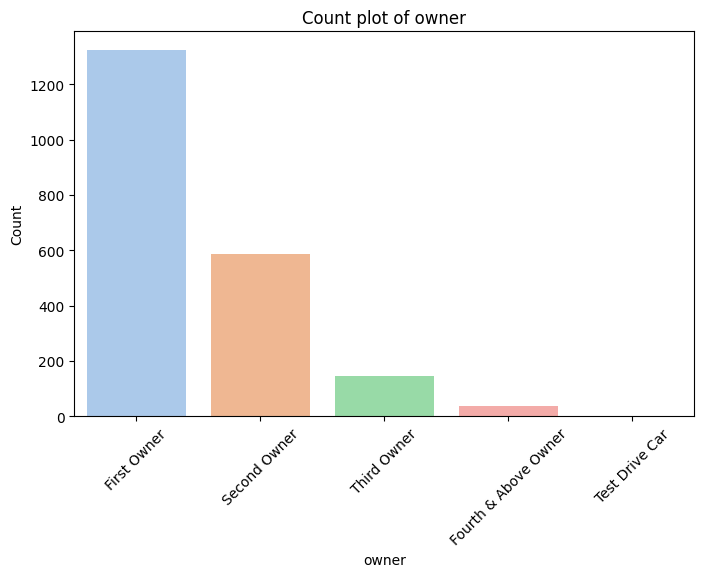

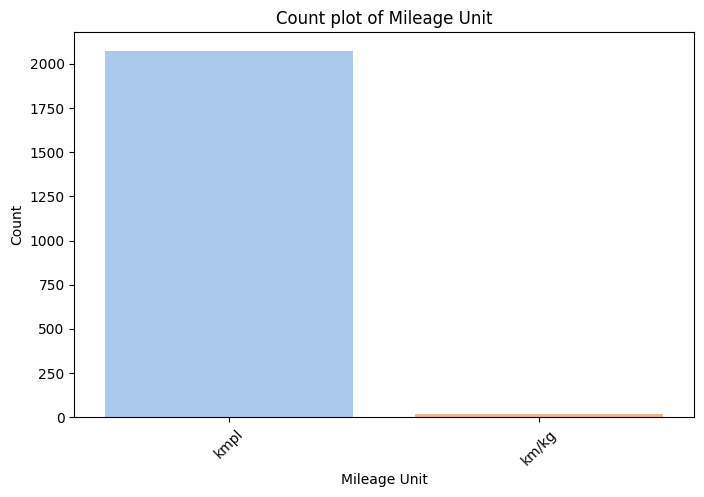

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue=col, palette='pastel')
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

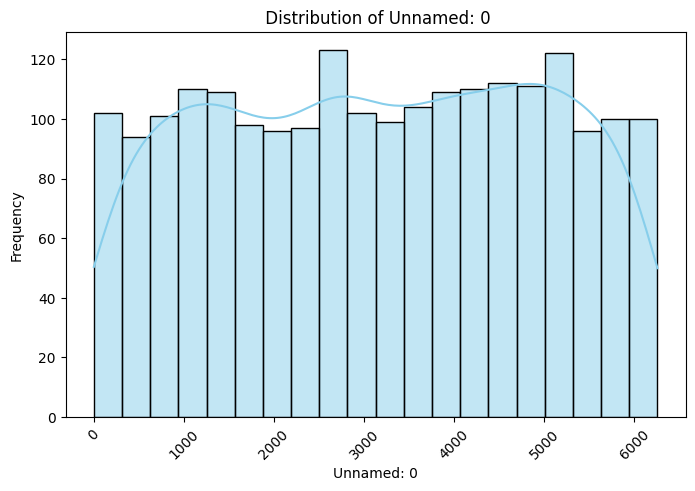

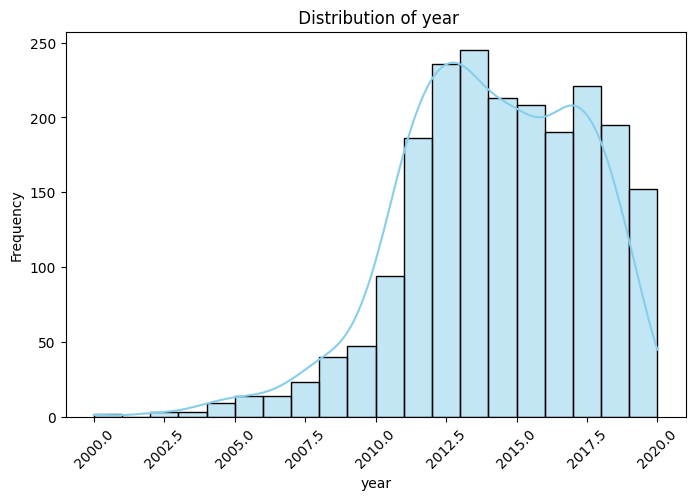

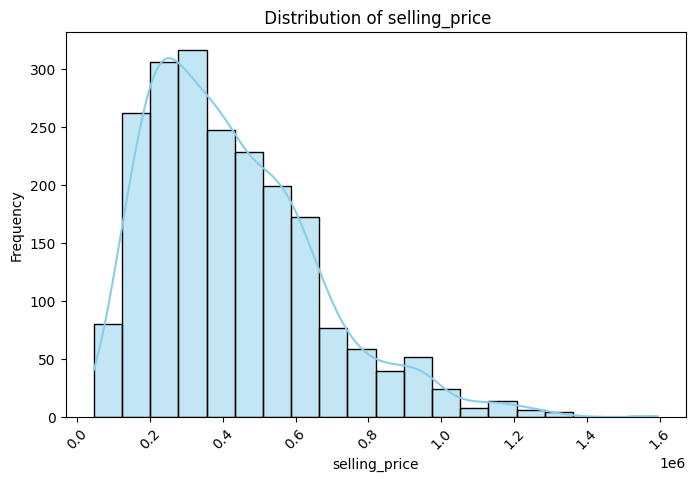

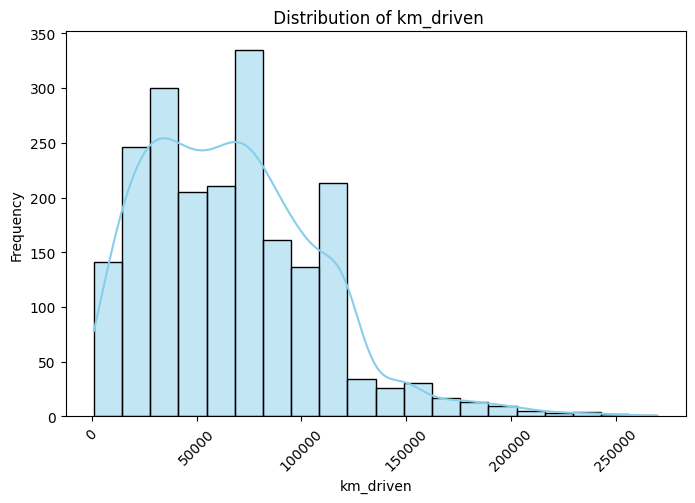

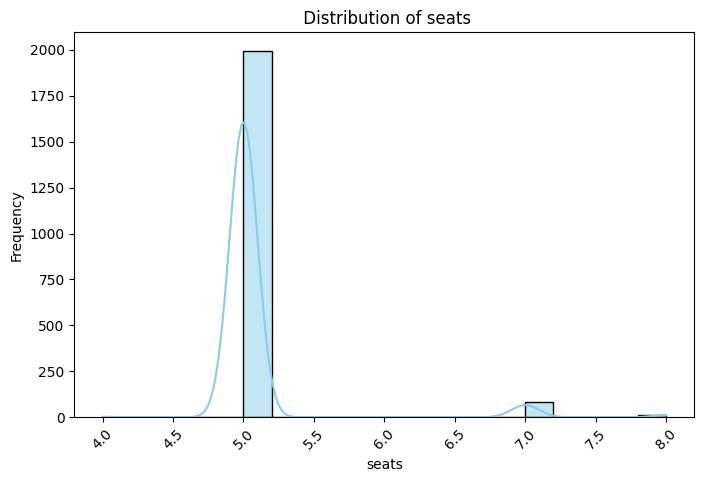

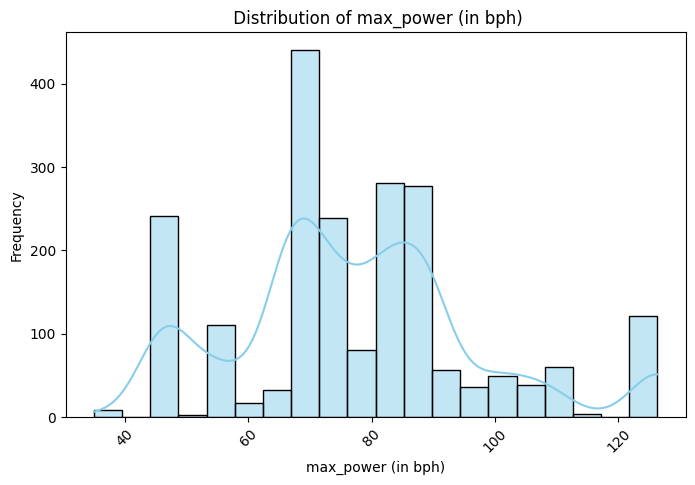

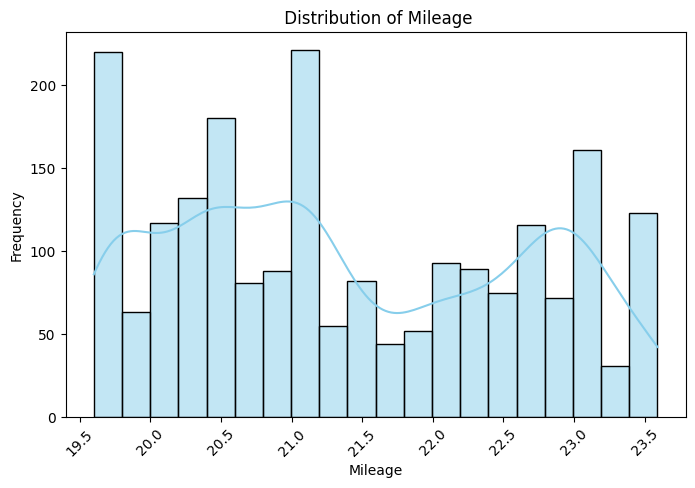

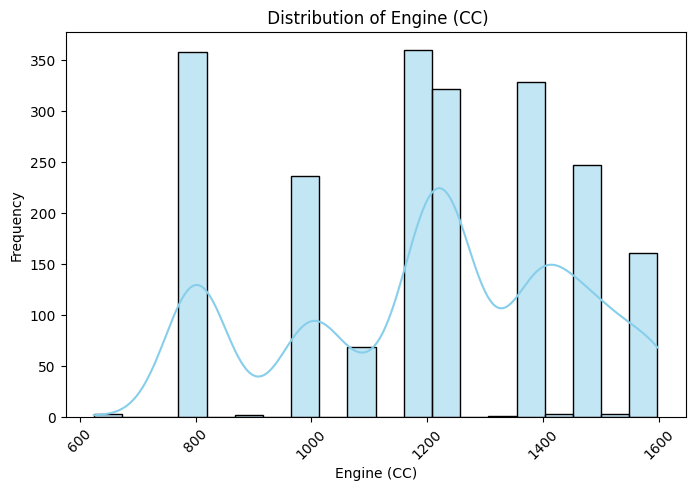

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=20, color='skyblue', kde=True)
    plt.title(f' Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

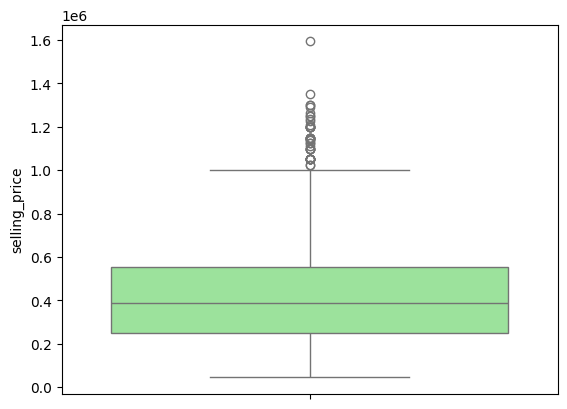

In [10]:
# Check the price for outliers
sns.boxplot(y=df.selling_price, color='lightgreen');

In [11]:
# Dropping mileafe because it does not reflect the true value in comparison with the km_drivem
cols_to_drop = ['Unnamed: 0', 'max_power (in bph)', 'seats', 'Mileage Unit', 'seller_type', 'Engine (CC)', 'Mileage', 'owner']
df1 = df.drop(cols_to_drop, axis='columns')

In [12]:
df1.head()

,name,year,selling_price,km_driven,fuel,transmission
0,Maruti,2014,450000,145500,Diesel,Manual
1,Hyundai,2010,225000,127000,Diesel,Manual
2,Hyundai,2017,440000,45000,Petrol,Manual
3,Toyota,2011,350000,90000,Diesel,Manual
4,Ford,2013,200000,169000,Diesel,Manual


In [13]:
# Check if there are null cols
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2095 non-null   object
 1   year           2095 non-null   int64 
 2   selling_price  2095 non-null   int64 
 3   km_driven      2095 non-null   int64 
 4   fuel           2095 non-null   object
 5   transmission   2095 non-null   object
dtypes: int64(3), object(3)
memory usage: 98.3+ KB


In [14]:
df1.km_driven.describe()

count      2095.000000
mean      67413.593795
std       41580.846333
min        1000.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      270000.000000
Name: km_driven, dtype: float64

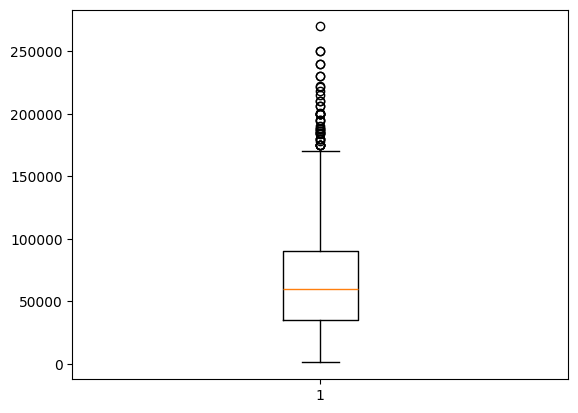

In [15]:
# Plot a boxplot to see the outliers in the km_driven
plt.boxplot(df1.km_driven);

In [16]:
df.selling_price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2095 entries, 0 to 2094
Series name: selling_price
Non-Null Count  Dtype
--------------  -----
2095 non-null   int64
dtypes: int64(1)
memory usage: 16.5 KB


In [17]:
# Remove outliers in the km_driven using zscore
df1['zscore_km'] = (df1.km_driven-df1.km_driven.mean())/df1.km_driven.std()
df1['zscore_price'] = (df1.selling_price-df1.selling_price.mean())/df1.selling_price.std()


In [18]:
df1.head()

,name,year,selling_price,km_driven,fuel,transmission,zscore_km,zscore_price
0,Maruti,2014,450000,145500,Diesel,Manual,1.877942,0.097650
1,Hyundai,2010,225000,127000,Diesel,Manual,1.433025,-0.869386
2,Hyundai,2017,440000,45000,Petrol,Manual,-0.539036,0.054670
3,Toyota,2011,350000,90000,Diesel,Manual,0.543193,-0.332144
4,Ford,2013,200000,169000,Diesel,Manual,2.443106,-0.976834


In [19]:
df1.km_driven.describe()

count      2095.000000
mean      67413.593795
std       41580.846333
min        1000.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      270000.000000
Name: km_driven, dtype: float64

In [20]:
# Use zscore 3 to remove outliers
df2 = df1[(df1.zscore_km<1) & (df1.zscore_km>-1)]


df2.km_driven.describe()

count      1372.000000
mean      63756.229592
std       22202.840116
min       26000.000000
25%       44726.000000
50%       62000.000000
75%       80000.000000
max      108916.000000
Name: km_driven, dtype: float64

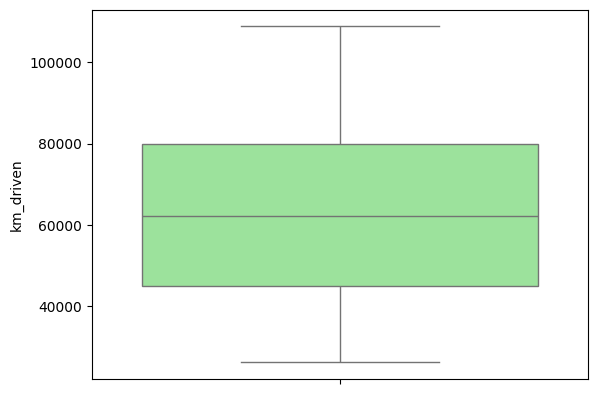

In [21]:
sns.boxplot(y=df2.km_driven, color='lightgreen');


In [22]:
df2 = df1[(df1.zscore_price<1) & (df1.zscore_price>-1)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1524 entries, 0 to 2094
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1524 non-null   object 
 1   year           1524 non-null   int64  
 2   selling_price  1524 non-null   int64  
 3   km_driven      1524 non-null   int64  
 4   fuel           1524 non-null   object 
 5   transmission   1524 non-null   object 
 6   zscore_km      1524 non-null   float64
 7   zscore_price   1524 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 107.2+ KB


In [23]:
df2.selling_price.describe()

count      1524.000000
mean     396849.017717
std      133370.011744
min      195000.000000
25%      280000.000000
50%      385000.000000
75%      500000.000000
max      655000.000000
Name: selling_price, dtype: float64

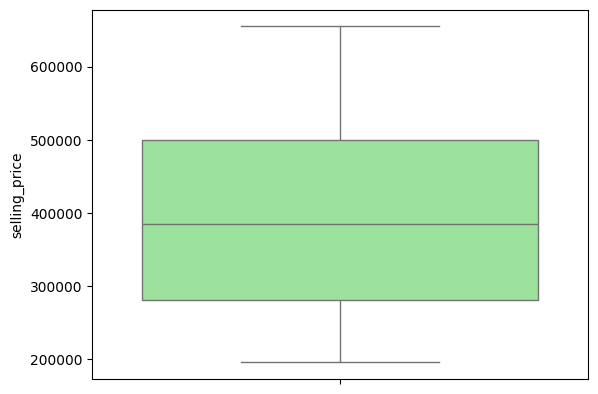

In [24]:
sns.boxplot(y=df2.selling_price, color='lightgreen');

In [25]:
df2.head(10)

,name,year,selling_price,km_driven,fuel,transmission,zscore_km,zscore_price
0,Maruti,2014,450000,145500,Diesel,Manual,1.877942,0.097650
1,Hyundai,2010,225000,127000,Diesel,Manual,1.433025,-0.869386
2,Hyundai,2017,440000,45000,Petrol,Manual,-0.539036,0.054670
3,Toyota,2011,350000,90000,Diesel,Manual,0.543193,-0.332144
4,Ford,2013,200000,169000,Diesel,Manual,2.443106,-0.976834
5,Hyundai,2012,500000,53000,Diesel,Manual,-0.346640,0.312546
9,Maruti,2012,600000,72000,Diesel,Manual,0.110301,0.742340
10,Tata,2018,500000,35000,Petrol,Manual,-0.779532,0.312546
11,Maruti,2016,575000,45000,Petrol,Manual,-0.539036,0.634892
13,Tata,2011,265000,120000,Diesel,Manual,1.264679,-0.697468


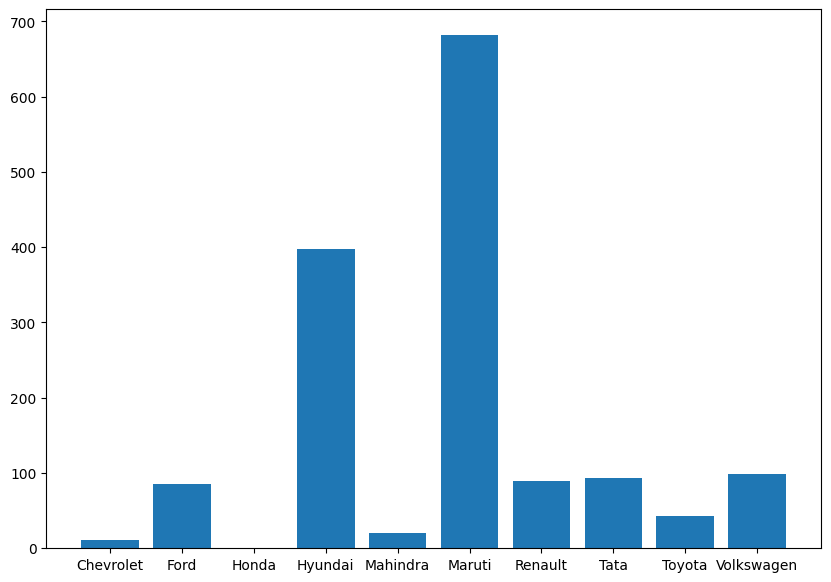

In [26]:
# Show occurences of each car name in the ds
x = df2.groupby('name')['name'].count().index
height = df2.groupby('name')['name'].count().values

plt.figure(figsize=(10,7))
plt.bar(x, height=height);

In [27]:
# get dummies for name
# Do label encoding for transimission
# Create another column for age from the year col, then remove the year col

In [28]:
# Create an age column
df2['age'] = df2.year.apply(lambda x: datetime.now().year - x)

/tmp/ipykernel_857856/759065589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age'] = df2.year.apply(lambda x: datetime.now().year - x)


In [29]:
df2.head()

,name,year,selling_price,km_driven,fuel,transmission,zscore_km,zscore_price,age
0,Maruti,2014,450000,145500,Diesel,Manual,1.877942,0.097650,10
1,Hyundai,2010,225000,127000,Diesel,Manual,1.433025,-0.869386,14
2,Hyundai,2017,440000,45000,Petrol,Manual,-0.539036,0.054670,7
3,Toyota,2011,350000,90000,Diesel,Manual,0.543193,-0.332144,13
4,Ford,2013,200000,169000,Diesel,Manual,2.443106,-0.976834,11


In [30]:
# Drop year col and zscore col
cols_to_drop = ['zscore_km', 'zscore_price', 'year', 'fuel', 'transmission']
df3 = df2.drop(cols_to_drop, axis=1)
df3.head()

,name,selling_price,km_driven,age
0,Maruti,450000,145500,10
1,Hyundai,225000,127000,14
2,Hyundai,440000,45000,7
3,Toyota,350000,90000,13
4,Ford,200000,169000,11


In [31]:
df2.fuel.unique()

array(['Diesel', 'Petrol', 'CNG', 'LPG'], dtype=object)

In [32]:
# Use LabelEncoder for fuel
# Create an instance of LabelEncoder()
le = LabelEncoder()

In [33]:
# df3.fuel = le.fit_transform(df3.fuel)

In [34]:
df3.head(10)

,name,selling_price,km_driven,age
0,Maruti,450000,145500,10
1,Hyundai,225000,127000,14
2,Hyundai,440000,45000,7
3,Toyota,350000,90000,13
4,Ford,200000,169000,11
5,Hyundai,500000,53000,12
9,Maruti,600000,72000,12
10,Tata,500000,35000,6
11,Maruti,575000,45000,8
13,Tata,265000,120000,13


In [35]:
# # Show of a plot of occurences
# x = df2.groupby('owner')['owner'].count().index
# height = df2.groupby('owner')['owner'].count().values

# plt.figure(figsize=(10,7))
# plt.bar(x, height=height);

In [36]:
# Use one-hot encoding (dummies) for owner and model
# fuel_dummies = pd.get_dummies(df3.fuel, dtype='int64', drop_first=True)
# trans_dummies = pd.get_dummies(df3.transmission, dtype='int64', drop_first=True)
name_dummies = pd.get_dummies(df3.name, dtype='int64', drop_first=True)
df4 = pd.concat([df3, name_dummies], axis=1)

In [37]:
df4.head()

,name,selling_price,km_driven,age,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Tata,Toyota,Volkswagen
0,Maruti,450000,145500,10,0,0,0,0,1,0,0,0,0
1,Hyundai,225000,127000,14,0,0,1,0,0,0,0,0,0
2,Hyundai,440000,45000,7,0,0,1,0,0,0,0,0,0
3,Toyota,350000,90000,13,0,0,0,0,0,0,0,1,0
4,Ford,200000,169000,11,1,0,0,0,0,0,0,0,0


In [38]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1524 entries, 0 to 2094
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1524 non-null   object
 1   selling_price  1524 non-null   int64 
 2   km_driven      1524 non-null   int64 
 3   age            1524 non-null   int64 
 4   Ford           1524 non-null   int64 
 5   Honda          1524 non-null   int64 
 6   Hyundai        1524 non-null   int64 
 7   Mahindra       1524 non-null   int64 
 8   Maruti         1524 non-null   int64 
 9   Renault        1524 non-null   int64 
 10  Tata           1524 non-null   int64 
 11  Toyota         1524 non-null   int64 
 12  Volkswagen     1524 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 166.7+ KB


In [39]:
# Drop name and owner cols
cols_to_drop = ['name']
df5 = df4.drop(cols_to_drop, axis=1)
df5.head()

,selling_price,km_driven,age,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Tata,Toyota,Volkswagen
0,450000,145500,10,0,0,0,0,1,0,0,0,0
1,225000,127000,14,0,0,1,0,0,0,0,0,0
2,440000,45000,7,0,0,1,0,0,0,0,0,0
3,350000,90000,13,0,0,0,0,0,0,0,1,0
4,200000,169000,11,1,0,0,0,0,0,0,0,0


In [40]:
# Create feature matrix and target vector
X = df5.drop('selling_price', axis=1)
y = df5.selling_price

In [41]:
y

0       450000
1       225000
2       440000
3       350000
4       200000
         ...  
2090    425000
2091    425000
2092    200000
2093    360000
2094    475000
Name: selling_price, Length: 1524, dtype: int64

In [42]:
# Scale our feature matrix
X

,km_driven,age,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Tata,Toyota,Volkswagen
0,145500,10,0,0,0,0,1,0,0,0,0
1,127000,14,0,0,1,0,0,0,0,0,0
2,45000,7,0,0,1,0,0,0,0,0,0
3,90000,13,0,0,0,0,0,0,0,1,0
4,169000,11,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2090,12000,7,0,0,0,0,1,0,0,0,0
2091,50000,10,0,0,0,0,0,0,0,1,0
2092,73000,13,0,0,0,0,1,0,0,0,0
2093,80000,7,0,0,0,0,1,0,0,0,0


In [43]:
scaler = StandardScaler()

In [44]:
min_max_scaler = MinMaxScaler()

In [45]:
y_scaled = scaler.fit_transform([y])

In [46]:
y_scaled = y_scaled.reshape(-1,1)

In [47]:
X_scaled = scaler.fit_transform(X)

In [48]:
X_scaled

array([[ 1.81575814,  0.13043011, -0.24455119, ..., -0.25638695,
        -0.17039494, -0.26357861],
       [ 1.38136579,  1.68640266, -0.24455119, ..., -0.25638695,
        -0.17039494, -0.26357861],
       [-0.54404895, -1.0365493 , -0.24455119, ..., -0.25638695,
        -0.17039494, -0.26357861],
       ...,
       [ 0.11340974,  1.29740952, -0.24455119, ..., -0.25638695,
        -0.17039494, -0.26357861],
       [ 0.27777442, -1.0365493 , -0.24455119, ..., -0.25638695,
        -0.17039494, -0.26357861],
       [ 0.27777442,  0.13043011, -0.24455119, ..., -0.25638695,
        -0.17039494, -0.26357861]])

In [49]:
# Split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [50]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [51]:
def get_best_model(X,y):
    model_params = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'n_jobs': [1,3,5],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(max_iter=1000, tol=0.1),
            'params': {
                'alpha': [10,20,50],
                'selection': ['random', 'cyclic']
            }
        },
        'decission_tree_reg': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['poisson', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    for model_name, mp in model_params.items():
        gs = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model_name': model_name,
            'best_params': gs.best_params_,
            'best_score': gs.best_score_
        })
    return pd.DataFrame(scores, columns=['model_name', 'best_params', 'best_score'])


get_best_model(X_train, y_train)

,model_name,best_params,best_score
0,linear_regression,"{'n_jobs': 1, 'positive': False}",0.274510
1,lasso,"{'alpha': 20, 'selection': 'cyclic'}",0.275199
2,decission_tree_reg,"{'criterion': 'friedman_mse', 'splitter': 'ran...",-0.013575


In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
lr.score(X_test, y_test)

0.2704151805718704

In [54]:
pca = PCA(0.95)

In [55]:
X_pca = pca.fit_transform(X)

In [56]:
pca.n_components_

np.int64(1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42, test_size=0.2)

In [58]:
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
lr.score(X_test, y_test)

-0.014691701813263958

In [60]:
X.columns

Index(['km_driven', 'age', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Renault', 'Tata', 'Toyota', 'Volkswagen'],
      dtype='object')

In [61]:
X_train_prediction = lr.predict(X_train)
training_data_accuracy = mean_absolute_error(y_train, X_train_prediction)

In [62]:
X_train_prediction

array([415814.81824459, 406295.09074314, 403254.01374742, ...,
       399631.28152167, 408199.03628775, 364408.28975004])

In [63]:
X_test_pred = lr.predict(X_test)
testing_data_accuracy = mean_absolute_error(y_test, X_test_pred)
testing_data_accuracy

np.float64(113426.70969623885)

In [64]:
lr.score(X_test, y_test)

-0.014691701813263958

In [65]:
# def get_predict_price(km_driven, fuel, age, manual, model)